In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


1. IMPORT DATASET

In [153]:
#a/ Load the data set
df = pd.read_excel("Data_AIL.xlsx")
df.head()

,e,no. video,Student ID,Full name,id,standardized dish,dish occurence (based on transcript),dish imply,start time,end time,...,sauce (based on transcript),venue,container,describe how to make it,viewer feeling of youtuber's style,viewer feeling of presented food,YouTuber feeling,location,foreigner,Unnamed: 24
0,1.0,51.0,NaN,NaN,5OzrpNCyXqs,snail vermicelli soup,bun oc,NaN,1:05,3:21,...,NaN,street restaurant,bowl,1.0,4.0,NaN,5.0,HN,1.0,NaN
1,2.0,51.0,NaN,NaN,5OzrpNCyXqs,vermicelli with fried tofu and shrimp paste,bun dau mam tom,NaN,3:32,6:10,...,"fish sauce, fermented shrimp paste, pepper, ch...",street restaurant,tray,1.0,4.0,NaN,4.0,HN,1.0,NaN
2,3.0,51.0,NaN,NaN,5OzrpNCyXqs,fried spring roll,spring roll,NaN,5:23,6:10,...,"fish sauce, sweet spicy garlic sauce",street restaurant,plate,0.0,5.0,NaN,5.0,HN,1.0,NaN
3,4.0,51.0,NaN,NaN,5OzrpNCyXqs,steamed rolled rice pancake,banh cuon,NaN,6:22,9:23,...,"garlic water, fried caramelized scallion, pepp...",street restaurant,plate,1.0,5.0,NaN,5.0,HN,1.0,NaN
4,5.0,51.0,NaN,NaN,5OzrpNCyXqs,shrimp cake,shrimp cake,NaN,9:42,11:55,...,"chili, sweet spicy sauce",street restaurant,plate,1.0,4.0,NaN,5.0,HN,1.0,NaN


In [154]:
print(df.shape)

(3850, 25)


In [155]:
#b/ Select features
data = df[["start time","end time","Unnamed: 11","viewer feeling of youtuber's style "]]

In [156]:
data.head()

,start time,end time,Unnamed: 11,viewer feeling of youtuber's style
0,1:05,3:21,9,4.0
1,3:32,6:10,11,4.0
2,5:23,6:10,4,5.0
3,6:22,9:23,5,5.0
4,9:42,11:55,4,4.0


In [157]:
data= data.dropna(axis= 0)
data.describe()

,Unnamed: 11
count,3771.000000
mean,3.279236
std,2.804457
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,20.000000


In [158]:
# convert start time and end time to seconds
import re
def __check_value_time(hours=0, minutes=0, seconds=0):
    # print('Time out: 'hours, minutes, seconds)
    if hours > 24:
        print('Time error: ',hours, minutes, seconds)
        raise ValueError('Hour is out of range')

    if seconds > 60:
        print('Time error: ',hours, minutes, seconds)
        raise ValueError('Second is out of range')

    if minutes > 60:
        print('Time error: ',hours, minutes, seconds)
        raise ValueError('Minutes is out of range')

def process_time_str(time_str):
    time_data = re.findall('[0-9]?[0-9]', time_str)
    TIME_WITH_HOUR = 3
    TIME_WITH_MINUTES = 2
    TIME_WITH_SECONDS = 1
    MAX_SECONDS = 90060
    # print(time_data)
    if len(time_data) == TIME_WITH_HOUR:
        hours = int(time_data[0])
        minutes = int(time_data[1])
        seconds = int(time_data[2])

        __check_value_time(hours, seconds, minutes)

        return (hours*3600 + minutes*60 + seconds)
    if len(time_data) == TIME_WITH_MINUTES:
        minutes = int(time_data[0])
        seconds = int(time_data[1])

        __check_value_time(minutes=minutes, seconds=seconds)

        return (minutes*60 + seconds)
    if len(time_data) == TIME_WITH_SECONDS:
        seconds = int(time_data[0])

        __check_value_time(seconds=seconds)

        return seconds

In [159]:
index_data = list()
for str_time in data['start time']:
    if str_time[0].isdigit() and str_time[-1].isdigit():
        index_data.append(True)
    else:
        index_data.append(False)

data = data[index_data]

index_data = list()
for str_time in data['end time']:
    if str_time[0].isdigit() and str_time[-1].isdigit():
        index_data.append(True)
    else:
        index_data.append(False)
data = data[index_data]
df_time = list()

for start_time, end_time in zip(data['start time'], data['end time']):
    df_time.append((process_time_str(start_time), process_time_str(end_time)))

data[['start time', 'end time']] = df_time
data["viewer feeling of youtuber's style "] = data["viewer feeling of youtuber's style "].astype('int')


In [160]:
data['duration'] = data['end time']- data['start time']

In [161]:
data= data.loc[data['duration']>=0]
data.head()

,start time,end time,Unnamed: 11,viewer feeling of youtuber's style,duration
0,65,201,9,4,136
1,212,370,11,4,158
2,323,370,4,5,47
3,382,563,5,5,181
4,582,715,4,4,133


In [162]:
# Normalization
data['duration'] = data['duration']/data['duration'].max()
data['Unnamed: 11'] = data['Unnamed: 11']/data['Unnamed: 11'].max()

# Phân loại 
input_data = data[['duration', 'Unnamed: 11']]
output_data = data["viewer feeling of youtuber's style "]/5

In [163]:
#convert to numpy
x=input_data.to_numpy()
y=output_data.to_numpy()
print(x,y)


[[0.08182912 0.45      ]
 [0.09506619 0.55      ]
 [0.02827918 0.2       ]
 ...
 [0.1143201  0.15      ]
 [0.1967509  0.2       ]
 [0.29602888 0.2       ]] [0.8 0.8 1.  ... 0.8 0.8 0.6]


In [164]:

#c/ Split it into two parts: 70% of which you will use to train your model and the remaining data will be used to test the model.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state=0)

In [165]:
print(x_train.shape)
print(x_test.shape)

(2592, 2)
(1111, 2)


2. Summarize and Visualize the dataset.

In [166]:
#a/ Explore the dimensions of data
#
feature = pd.DataFrame({"Viewer's feeling": y,"duration":x[:,0],"Number of ingredient":x[:,1]})
print("Data shape: ",feature.shape)

Data shape:  (3703, 3)


In [167]:
#b/ Show some instances from the data
#
feature.head(5)

,Viewer's feeling,duration,Number of ingredient
0,0.8,0.081829,0.45
1,0.8,0.095066,0.55
2,1.0,0.028279,0.20
3,1.0,0.108905,0.25
4,0.8,0.080024,0.20


In [168]:
#c/ Do Statistical summary of all attributes
#
feature.info()
feature.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703 entries, 0 to 3702
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Viewer's feeling      3703 non-null   float64
 1   duration              3703 non-null   float64
 2   Number of ingredient  3703 non-null   float64
dtypes: float64(3)
memory usage: 86.9 KB


,Viewer's feeling,duration,Number of ingredient
count,3703.000000,3703.000000,3703.000000
mean,0.748906,0.055880,0.164515
std,0.185374,0.066736,0.140864
min,0.000000,0.000000,0.000000
25%,0.600000,0.015644,0.050000
50%,0.800000,0.036101,0.150000
75%,0.800000,0.070999,0.250000
max,1.000000,1.000000,1.000000


Text(0, 0.5, "Viewer's feeling")

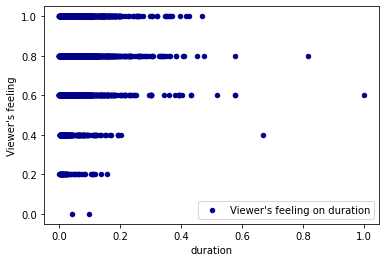

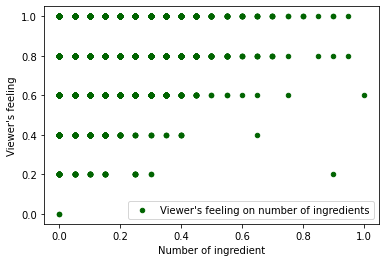

In [169]:
#ploting data
#bivarate
ax1 = feature.plot.scatter(x="duration", y="Viewer's feeling", color="DarkBlue", label="Viewer's feeling on duration")
ax1.set_xlabel("duration")
ax1.set_ylabel("Viewer's feeling")
ax2 = feature.plot.scatter(x="Number of ingredient", y="Viewer's feeling", color="DarkGreen", label="Viewer's feeling on number of ingredients")
ax2.set_xlabel("Number of ingredient")
ax2.set_ylabel("Viewer's feeling")

Text(0.5, 0, "Viewer's feeling")

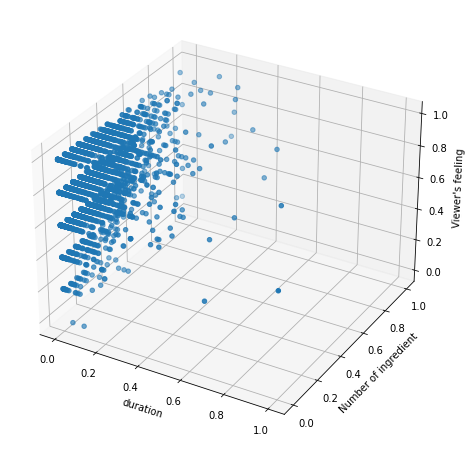

In [170]:
#multivariate
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=feature["duration"], ys=feature["Number of ingredient"],zs=feature["Viewer's feeling"]) #Plot scatter
ax.set_xlabel("duration")
ax.set_ylabel("Number of ingredient")
ax.set_zlabel("Viewer's feeling", rotation = 90)

3. Build linear regression model

In [171]:
#add collumn 1 in x
x_train = np.hstack((np.ones((x_train.shape[0],1)),x_train))
x_test = np.hstack((np.ones((x_test.shape[0],1)),x_test))

In [172]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [173]:

# linear regression using "mini-batch" gradient descent
# function to compute hypothesis / predictions
def hypothesis(X, theta):
    return np.dot(X, theta)
  
# function to compute gradient of error function w.r.t. theta
def gradient(X, y, theta):
    h = hypothesis(X, theta)
    grad = np.dot(X.transpose(), (h - y))
    return grad
  
# function to compute the error for current values of theta
def cost(X, y, theta,m):
    h = hypothesis(X, theta)
    J = np.dot((h - y).transpose(), (h - y))
    J /= (2 * m)
    return J[0][0]
  
# function to create a list containing mini-batches
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
  
    for i in range(n_minibatches):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches


  
# function to perform mini-batch gradient descent
def gradientDescent(X, y, learning_rate = 0.2, batch_size = 500):
    theta = np.zeros((X.shape[1], 1))
    theta_list = []
    cost_list = []
    max_iters = 5
    for itr in range(max_iters):
        mini_batches = create_mini_batches(X, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            m = np.size(y_mini)
            theta = theta - (learning_rate/m) * gradient(X_mini, y_mini, theta)            
            cost_list.append(cost(X_mini, y_mini, theta,m))
            theta_list.append(theta)       
    return  theta_list,cost_list

In [174]:
theta_list,cost_list = gradientDescent(x_train,y_train)
i =cost_list.index(min(cost_list))
print("Min Cost: ",cost_list[i])
theta = theta_list[i]
print("Coeficient: ",theta)


Min Cost:  0.014121386191451417
Coeficient:  [[0.72144797]
 [0.04572872]
 [0.13716478]]


Text(0, 0.5, 'cost')

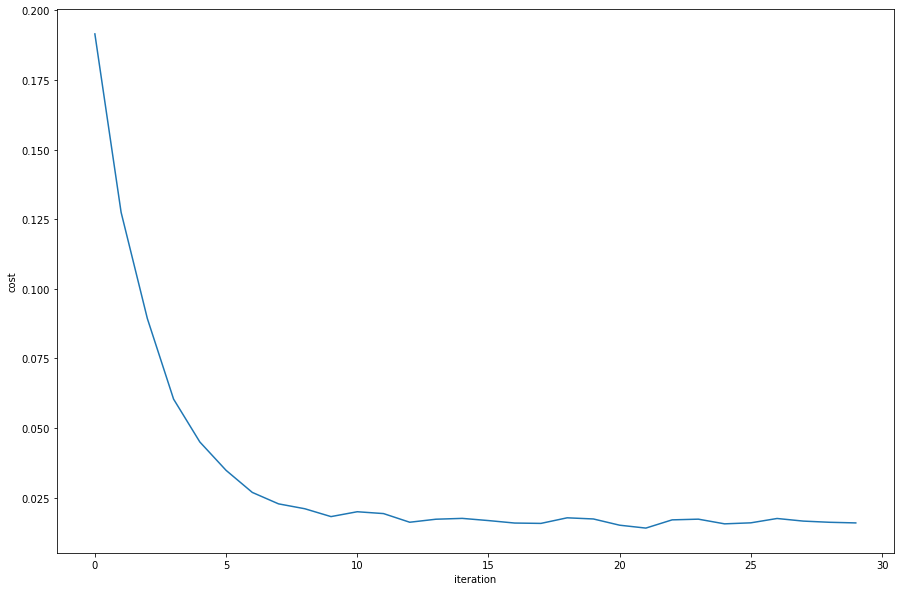

In [175]:
#cost on iteration
plt.figure(figsize=(15,10))
plt.plot(cost_list)
plt.xlabel("iteration")
plt.ylabel("cost")

4. Compare the results and make prediction

In [203]:
def predict_standardize(pred):
    i=0
    for p in pred:
        if(p[0]<1.5):
            pred[i][0] = 1
        if(p[0]>=1.5 and p[0]<2.5):
            pred[i][0] = 2
        if(p[0]>=2.5 and p[0]<3.5):
            pred[i][0] = 3
        if(p[0]>=3.5 and p[0]<4.5):
            pred[i][0] = 4
        if(p[0]>=4.5):
            pred[i][0] = 5
        i +=1
    return pred          
    


In [207]:
y_predict = hypothesis(x_test,theta) * 5
pred =predict_standardize(y_predict)
print(pred)
y_test = y_test * 5



[[4.]
 [4.]
 [4.]
 ...
 [4.]
 [4.]
 [4.]]


In [210]:
print(f'Training Set Accuracy: {(pred == y_test).mean() * 100:f}')

Training Set Accuracy: 36.108435


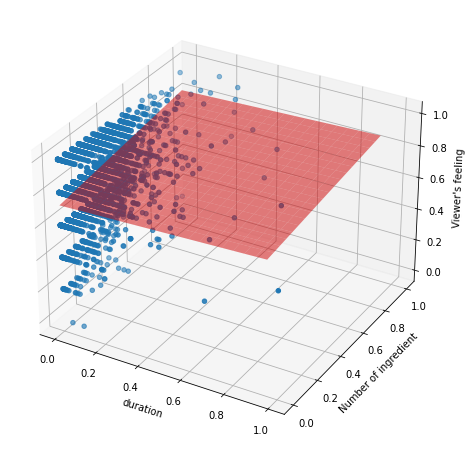

In [212]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=feature["duration"], ys=feature["Number of ingredient"],zs=feature["Viewer's feeling"]) #Plot scatter
ax.set_xlabel("duration")
ax.set_ylabel("Number of ingredient")
ax.set_zlabel("Viewer's feeling", rotation = 90)

xs = np.tile(np.arange(0,1,0.05),(1,1))
ys = np.tile(np.arange(0,1,0.05),(1,1)).T
zs = xs*theta[1]+ys*theta[2]+theta[0]

ax.plot_surface(xs,ys,zs, alpha=0.5, color = 'red')

In [211]:
#compare
result = pd.DataFrame({'Actual Value':y_test.reshape(y_test.shape[0],),'Predicted Value':y_predict.reshape(y_predict.shape[0],),"Difference": (y_test - y_predict).reshape(y_test.shape[0])})
result[0:30]

,Actual Value,Predicted Value,Difference
0,5.0,4.0,1.0
1,5.0,4.0,1.0
2,3.0,4.0,-1.0
3,5.0,4.0,1.0
4,5.0,4.0,1.0
5,3.0,4.0,-1.0
6,4.0,4.0,0.0
7,4.0,4.0,0.0
8,4.0,4.0,0.0
9,5.0,4.0,1.0
